In [280]:
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs
import numpy as np
import pickle
import torch.utils.data as data_0
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint


# The potential and its first derivative, as callables.
V = lambda x: 0.5 * x**2 * (0.5 * x**2 - 1)
dVdx = lambda x: x**3 - x



def deriv(X, t, gamma, delta, omega):
    """Return the derivatives dx/dt and d2x/dt2."""

    x, xdot = X
    xdotdot = -dVdx(x) -delta * xdot + gamma * np.cos(omega*t)
    return xdot, xdotdot

def solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega):
    """Solve the Duffing equation for parameters gamma, delta, omega.

    Find the numerical solution to the Duffing equation using a suitable
    time grid: tmax is the maximum time (s) to integrate to; t_trans is
    the initial time period of transient behaviour until the solution
    settles down (if it does) to some kind of periodic motion (these data
    points are dropped) and dt_per_period is the number of time samples
    (of duration dt) to include per period of the driving motion (frequency
    omega).

    Returns the time grid, t (after t_trans), position, x, and velocity,
    xdot, dt, and step, the number of array points per period of the driving
    motion.

    """
    # Time point spacings and the time grid

    period = 2*np.pi/omega
    dt = 2*np.pi/omega / dt_per_period
    step = int(period / dt)
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t, args=(gamma, delta, omega))
    idx = int(t_trans / dt)
    return t[idx:], X[idx:], dt, step


def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


# Set up the motion for a oscillator with initial position
# x0 and initially at rest.
x0, v0 = 0, 0
tmax, t_trans = 300, 0
omega = 3*np.random.rand(1)
gamma, delta = np.random.rand(1), 0.001
dt_per_period = 100/omega

# Solve the equation of motion.
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega)
x, xdot = X.T

print(len(t))

4775


In [287]:

def raw_data_generator(Num):
    
    train_x = []
    train_y = []


    for i in range(Num):
    
                # Set up the motion for a oscillator with initial position
        # x0 and initially at rest.
        x0, v0 = 0, 0
        tmax, t_trans = 300, 0
        omega = 3*np.random.rand(1)
        gamma, delta = np.random.rand(1), 0.001
        dt_per_period = 100/omega

        # Solve the equation of motion.
        t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega)
        x, xdot = X.T
        
        for j in range(3):
            
            train_x.append(np.stack((x[j*1024:(j+1)*1024], (gamma * np.cos(omega*t))[j*1024:(j+1)*1024]), axis=1).astype(np.float32))
            train_y.append(x[(j+1)*1024:(j+2)*1024].astype(np.float32))
                           
        print(i)
  
    print('done')

    result = {'train_X' : train_x, 'train_Y' : train_y}
    
    return result

    
class Dataset(data_0.Dataset):
    def __init__(self, x_tensor, y_tensor):
        super(Dataset, self).__init__()

        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)


In [288]:
A = raw_data_generator(200)
createFolder('./data')
with open("./data/TRAIN.pickle","wb") as fw:
    pickle.dump(A, fw)
    
B = raw_data_generator(20)
createFolder('./data')
with open("./data/TEST.pickle","wb") as fw:
    pickle.dump(B, fw)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done


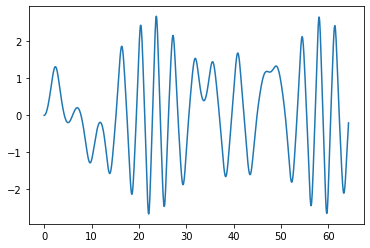

In [278]:
plt.plot(t[:1024],x[:1024])

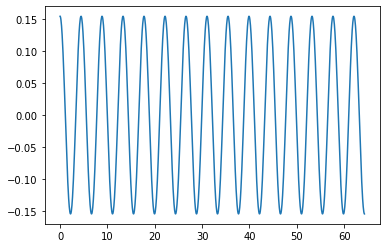

In [230]:
plt.plot(t[:1024], gamma * np.cos(omega*t)[:1024])